In [1]:
####### 1. Random variables and outcomes ########

In [2]:
#importing the packages
import pandas as pd
import numpy as np

In [3]:
#creating a random variable die and finding its sum in 100 trials and 2 dice are rolled at a time
die = pd.DataFrame([1,2,3,4,5,6])
trials = 100
die_sum = [die.sample(2,replace = True).sum().loc[0] for i in range(trials)]
print('The sum in the first 10 trials are',die_sum[:10])

The sum in the first 10 trials are [10, 4, 10, 5, 4, 9, 10, 3, 11, 8]


In [4]:
######## 2. Frequency and distribution ##########

In [5]:
#Calculate the frequency of occurance of each sum value using value_counts()
freq = pd.DataFrame(die_sum)[0].value_counts()
freq_sort = freq.sort_index()
print(freq_sort)

2      5
3      6
4      5
5     13
6     14
7     12
8     18
9      9
10    10
11     7
12     1
Name: 0, dtype: int64


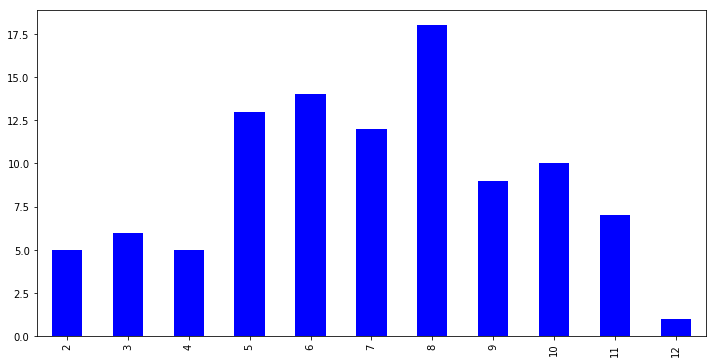

In [6]:
#plotting the sorted frequencies in a bar chart
import matplotlib.pyplot as plt
% matplotlib inline
freq_sort.plot(kind = 'bar', color='blue', figsize =(12,6))

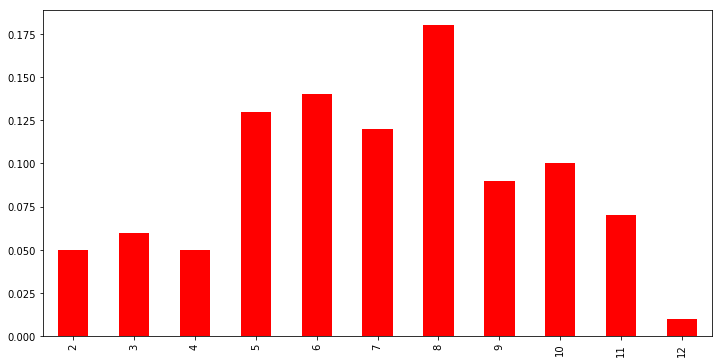

In [7]:
#Rescaling the frequency so as to compare the results with different number of trials
rel_freq = freq_sort/trials
rel_freq.plot(kind ='bar', color= 'red', figsize = (12,6))

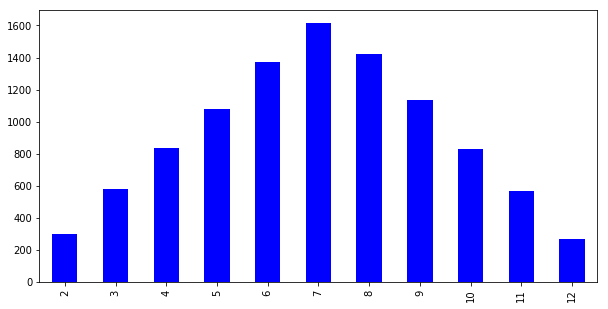

In [8]:
# Let us increase the number of trials to 10000 and see the outcome
trials = 10000
sum_die = [die.sample(2,replace = True).sum().loc[0] for i in range(trials)]
freq2 = pd.DataFrame(sum_die)[0].value_counts()
sort_freq2 = freq2.sort_index()
sort_freq2.plot(kind='bar', color='blue', figsize=(10,5))

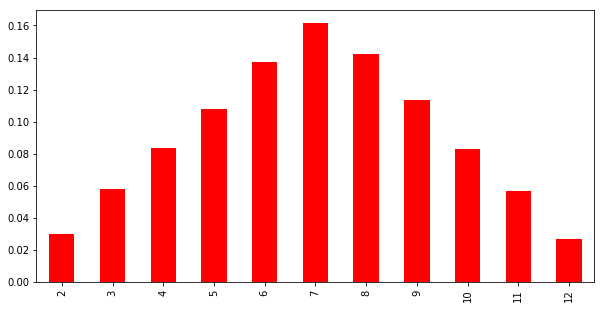

In [9]:
#Relative frequency of the trials
rel_freq2 = sort_freq2/trials
rel_freq2.plot(kind='bar', color='red', figsize=(10,5))

In [10]:
#Now let us check what is an expectation and variance of a distribution
#Firstly, assuming a fair dice, let us create a distribution

fairdie = pd.DataFrame(index=[2,3,4,5,6,7,8,9,10,11,12])
fairdie['Prob'] = [1,2,3,4,5,6,5,4,3,2,1]
fairdie['Prob'] = fairdie['Prob']/36
print(fairdie)

        Prob
2   0.027778
3   0.055556
4   0.083333
5   0.111111
6   0.138889
7   0.166667
8   0.138889
9   0.111111
10  0.083333
11  0.055556
12  0.027778


In [11]:
#Creating a distribution with enough number of trials
fairdie = pd.DataFrame([1,2,3,4,5,6])
t = 100
summed = [fairdie.sample(2,replace = True).sum().loc[0] for i in range(t)]
mu = pd.Series(summed).mean()
var = pd.Series(summed).var()
print('The mean is {} and the variance is {}'.format(mu,var))

The mean is 6.63 and the variance is 4.65969696969697


In [12]:
######## 3. Models of calculating stock returns ##########

In [13]:
#Firstly, let us understand the distribution of log returns
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['logreturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])
ms.head()

,Open,High,Low,Close,Adj Close,Volume,logreturn
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994


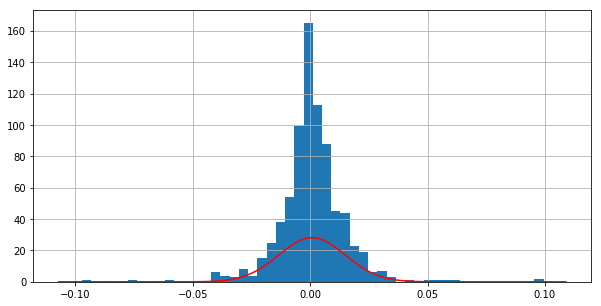

In [14]:
#Next, we will be checking the distribution of the log returns and see if it's normal
#We will be creating a distribution from the logreturns and then check if it fits normally on the lognormal values

distr = pd.DataFrame()
distr['x'] =  np.arange(ms['logreturn'].min()-0.01,ms['logreturn'].max()+0.01,0.001)
mu = ms['logreturn'].mean()
sigma = ms['logreturn'].std(ddof=1)
from scipy.stats import norm
distr['density'] = norm.pdf(distr['x'],mu,sigma)

import matplotlib.pyplot as plt
%matplotlib inline
ms['logreturn'].hist(bins=50, figsize=(10,5))
plt.plot(distr['x'], distr['density'], color='red')
plt.show()

In [15]:
#Now we will check the probability of a stock falling below a certain % in a day, say 3%
#We'll use the microsoft stock for the same

prob = norm.cdf(-0.03,mu,sigma)
print('The probabilty of the stock falling 3% next day is:', prob)

#Now we will check the same probabilty but for the entire year i.e 220 stock trading days
mu_an = mu*220
sigma_an = (220**0.5)*sigma
prob_annual = norm.cdf(-0.03,mu_an,sigma_an)
print('The probabilty of the stock falling 3% in the next one year is:',prob_annual)

The probabilty of the stock falling 3% next day is: 0.0149399791377
The probabilty of the stock falling 3% in the next one year is: 0.158711504549


In [16]:
#We'll now calculate VaR(Value at risk which measures by how much can a stock fall in 1 day) with a given CI
var = norm.ppf(0.05,mu,sigma)
print('VaR for 1 day is:',var)

VaR for 1 day is: -0.0225233624071


In [17]:
#Now we shall be measuring the quantiles and quartiles of the same
print('5% quantile is:', norm.ppf(0.05,mu,sigma))
print('95% quantile is:', norm.ppf(0.95,mu,sigma))
print('Q1 - first quartile(25% quantile) is:', norm.ppf(0.25,mu,sigma))
print('Q3 - third quartile(75% quantile) is:', norm.ppf(0.75,mu,sigma))

5% quantile is: -0.0225233624071
95% quantile is: 0.0241638253793
Q1 - first quartile(25% quantile) is: -0.00875205783841
Q3 - third quartile(75% quantile) is: 0.0103925208107
